# Dynamics Tests

First, let's import the packages we will use including numpy and matplotlib. 

Then, let's import our functions we will be using that handles the solve methods. 

* `population_model_exact_sol` returns an exact population model solution for the population at a given time.

* `population_model_veloc_function` represents the population model velocity function. 

* `dynamics_exact_solve` produces a time and value array for a given exact solution function(s_0, t_0, t).

* `harmonic_oscillator_d_hamiltonian` returns functions for the partial derivatives of the harmonic oscillator hamiltonian.

* `harmonic_oscillator_exact_sol` returns exact 1D simple harmonic oscillator functions.

* `hamiltonian_exact_solve` produces a time and value array for a given exact solution function x and p.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from proj_1_module import dynamics_solve, hamiltonian_solve
from proj_1_DynamicsTest import population_model_exact_sol, population_model_veloc_function, dynamics_exact_solve, dynamics_display_step_size_plot
from proj_1_HamiltonianTest import harmonic_oscillator_d_hamiltonian, harmonic_oscillator_exact_sol, hamiltonian_exact_solve

%matplotlib inline

## Population Model

1. Code tests of **Euler's method**, **RK2**, and **RK4** with the function `dynamics_solve` using the simple population model problem
\begin{align}
    \dot P(t) = (B - D) P(t), \qquad P(0) = P_0
\end{align}
whose exact solution can be easily computed for any given initial data.
    - Demonstrate that as long as the step size is chosen "sufficiently small," the numerical solution can be made to agree with the exact solution as closely as one desires.
    - Comment on what "sufficiently small" means for this system.  Is there a natural time scale in the problem to which the step size can be compared?  If the step size is small compared to this time scale, do the simulations work well?
    - Make sure to include appropriate plots that make the results of all of your testing clear.

Let $B$ be the Birth Rate. Let $D$ be the Death Rate. Then $P(t)$ is the population size at time $t$.

The simple population model $ \dot P(t) = (B - D) P(t)$ with inital condition $P(0) = P_0$ has solution: 

$$P(t) = P_0 e^{(B-D)t}$$

For this simple population model, we can test various numerical methods to solve this differential equation for multiple points in time. 

Let's use three different methods. 
* Euler's Method
* Runge-Kutta 2 (RK2)
* Runge-Kutta 4 (RK4)

First, let's verify that these methods will produce solutions that match the exact solution $P(t) = P_0 e^{(B-D)t}$.

Let $B = 1.5$, $D = 1.0$, and $P_0 = 1000$. I will use these values for all examples, unless specified otherwise. 

For a quick test, I will use the default values for $h$ (time step size) and $N$ (number of steps). These are $h = 0.1$ , $N = 100$.

In [2]:
# Define Constants
b = 1.5
d = 1
p_0 = 1000

# Create numpy arrays containing the exact solutions
p_exact = population_model_exact_sol(b, d)
t_exact, s_exact = dynamics_exact_solve(p_exact, s_0 = p_0)

# Define the population model velocity function
p_model = population_model_veloc_function(b, d)

# Create numpy arrays containing numerical solutions for different methods. 
t_euler, s_euler = dynamics_solve(p_model, s_0 = p_0, method = "Euler")
t_rk2, s_rk2 = dynamics_solve(p_model, s_0 = p_0, method = "RK2")
t_rk4, s_rk4 = dynamics_solve(p_model, s_0 = p_0, method = "RK4")

NameError: name 'population_model_exact_sol' is not defined

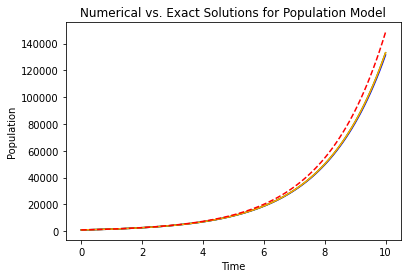

In [3]:
# Plot all of the model solutions
plt.plot(t_euler, s_euler, color = "blue")
plt.plot(t_rk2, s_rk2, color = "green")
plt.plot(t_rk4, s_rk4, color = "orange")
plt.plot(t_exact, s_exact, color = "red", linestyle = "--")

# Define Labels
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Numerical vs. Exact Solutions for Population Model')

# Display Plot
plt.show()

The exact solution given by $P(t) = P_0 e^{(B-D)t}$ is displayed as a dashed red line. 

The Euler, RK2, and RK4 methods are displayed as a solid blue, green, and orange line respectively.

As we can see, the numerical solutions roughly match the exact solutions, but they diverge over time. It is also curious to note that all three numerical methods produce a similar solution for these parameters. 

### Step Size

It can be seen that decreasing our step size $h$ in our numerical methods produce a solution that more closely agrees with the exact solution. 

Let's test various step sizes over a total time period of $t_{total} = 10$ for the following step sizes:

* $h = 1$
* $h = 0.5$
* $h = 0.1$
* $h = 0.05$
* $h = 0.01$

In the plot, the largest step size ($h = 1$) is displayed in blue. The smallest step size ($h = 0.01$) is displayed in green. All intermediate step sizes are a gradient inbetween the two. 

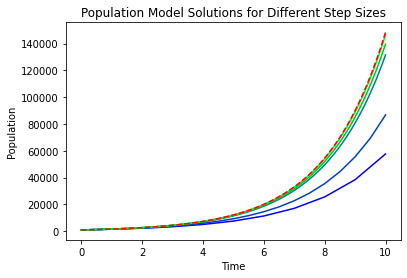

In [4]:
# I extracted these methods into functions of proj_1_DynamicsTest to reduce duplicate code. 
dynamics_display_step_size_plot("Euler")

Using the Euler Method, it is very clear that a smaller step size produces a numerical solution closer to the exact solution. It seems that this method greatly benefits from a smaller step size, as there is still a noticable difference between $h = 0.05$ and $h = 0.01$.

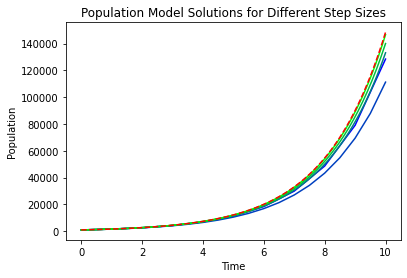

In [5]:
dynamics_display_step_size_plot("RK2")

The RK2 Method produces similar results to the Euler Method, but the solutions for a larger step size are closer to the exact solution for the RK2 Method compared to the Euler Method. 

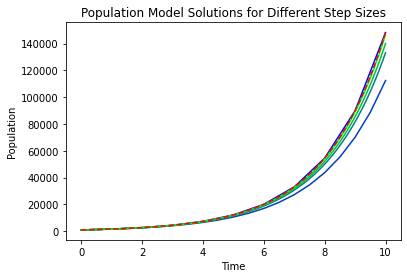

In [6]:
dynamics_display_step_size_plot("RK4")

For the RK4 Method, interestingly enough, a step size of $h = 1$ produces a solution that is very close to the actual solution. However, for a relatively small step size, our granularity greatly increases and the solutions become more exact. Once again, as the step size gets smaller, the numerical solutions more closely resemble the exact solutions. 

By simply visually observing the plots of different step sizes, it appears that regardless of the method we use, we would want to use a step size smaller than $h = 0.01$ for our parameters. So in this case, $h = 0.01$ is "sufficiently small". 

"Sufficiently small" can mean a number of things. In this case, the step size of $h = 0.01$ is sufficent in producing a solution set valid over a long time period. 

For the Euler method, the least accurate method, even after a long time period such as $t = 100$, with a step size of $h = 0.01$, we only get an error of $11.71\%$. 

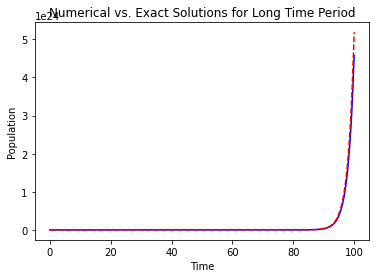

11.71% Error after t = 100.


In [7]:
# Define Constants
b = 1.5
d = 1
p_0 = 1000
t_total = 100
h = 0.01

# Create numpy arrays containing the exact solutions
p_exact = population_model_exact_sol(b, d)
t_exact, s_exact = dynamics_exact_solve(p_exact, s_0 = p_0, h = h, N = int(t_total/h))

# Define the population model velocity function
p_model = population_model_veloc_function(b, d)

# Create numpy arrays containing numerical solutions for different methods. 
t_euler, s_euler = dynamics_solve(p_model, s_0 = p_0, h = h, N = int(t_total/h), method = "Euler")

# Plot all of the model solutions
plt.plot(t_euler, s_euler, color = "blue")
plt.plot(t_exact, s_exact, color = "red", linestyle = "--")

# Define Labels
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Numerical vs. Exact Solutions for Long Time Period')

# Display Plot
plt.show()

# Calculate percent error after t = 100
print(f"{round(100 * (s_exact[-1] - s_euler[-1]) / s_exact[-1], 2)}% Error after t = 100.")

Although choosing a smaller step size than $h = 0.01$ will result in a smaller error, we reach the point where decreasing the step size any further will result in a noticable compuational time increase. 

However, the step size one would deem to be "sufficiently small" depends on the parameters and conditions. If you care about an accurate result over a long time period, then you would want to choose a smaller step size (and more accurate method like RK4), and deal with the extra compute time. 

The step size we chose also may depend on the time scale we choose. For a population model, we may choose a time scale of years, such that $h = 1$ is one year. In that case, a step size of $h = 0.01$ is rougly 3.5 days. On the scale of 10 years, a step size of 3.5 days is fairly reasonable. 

## Harmonic Oscillator

2. Code tests of **Euler's method**, **RK2**, **RK4**, **Symplectic Euler**, and **Stormer Verlet** with the function `hamiltonian_solve` by using Hamilton's equations for the classical simple harmonic oscillator as a test case.  
    - Show that over a fixed number of oscillation periods and for a given set of initial data, if the step size is made sufficiently small relative to the period, then the numerical solution can be made to closely match the known exact solution for all methods (Euler, RK2, RK4, Symplectic Euler, Stormer-Verlet).  Make sure to include appropriate plots that make all of this clear.
    - Show that for a fixed step size, if the number of periods is made sufficiently large, then all of the methods begin to deviate from the known exact solution.  Comment on which methods tend to deviate more severely.  Comment on the difference in the way that the Runge-Kutta methods tend to deviate from the exact solution as compared to the symplectic methods. Make sure to include appropriate plots that make all of this clear.
    - Discuss how the energy of the system evolves in time for the numerical solutions generated by each of the four numerical methods.  Make sure to include appropriate plots that make all of this clear.

The Hamiltonian for a simple harmonic oscillator in 1D is:
$$H= \frac{p^2}{2m}+\frac{1}{2}m\omega ^2 x^2$$

Where $p$ is the momentum, $m$ is the mass, $\omega = \sqrt{\frac{k}{m}}$ where $k$ is the restoring constant, and $x$ is the position.

Our `hamiltonian_solve` method requires two functions. The partial derivative of $H$ with respect to position and momentum. Note that the code uses `q` to represent position, and `p` to represent momentum. 

So, for our simple harmonic oscillator, $\frac{\partial H}{\partial q}=m \omega ^2 q$, and $\frac{\partial H}{\partial p}=\frac{p}{m}$. The method `harmonic_oscillator_d_hamiltonian` generates these two functions, which can then be passed to `hamiltonian_solve`. 

The exact solution for this hamiltonian is 

$$x(t) = x_0 \cos(\omega (t-t_0))+\frac{p_0}{m \omega }\sin(\omega (t-t_0))$$

$$p(t) = p_0 \cos(\omega (t-t_0))-m \omega x_0 \sin(\omega (t-t_0))$$

The method `harmonic_oscillator_exact_sol` generates these two functions.

For all cases, let $m = 1$ and $\omega = 1$, $t_0 = 0$, $x(0) = 0$, and $p(0) = 1$.

The solutions we should expect with these parameters should have the form 

$$x(t) = \sin(t)$$

$$p(t) = \cos(t)$$

The period for the simple harmonic oscillator is $T=\frac{2\pi}{\omega}$. For our parameters, $T=2\pi$.

Similar to the population model dynamic solve, let's test various step sizes over a total period of 10 oscillatons. Hence, $ t_{total} = 10 \cdot T $.

* $h = 1 \cdot T$
* $h = 0.5 \cdot T$
* $h = 0.1 \cdot T$
* $h = 0.05 \cdot T$
* $h = 0.01 \cdot T$

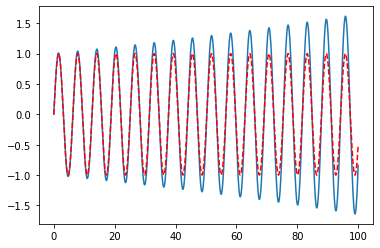

In [8]:
m, w = 1, 1
d_qH, d_pH = harmonic_oscillator_d_hamiltonian(m, w)
h = 0.01
N = int(100/h)

x_t, p_t = harmonic_oscillator_exact_sol(m, w)
t_exact, x_exact, p_exact = hamiltonian_exact_solve(x_t, p_t, h = h, N = N)

t, q, p = hamiltonian_solve(d_qH, d_pH, h = h, N = N, method="Euler")

plt.plot(t, q)
plt.plot(t_exact, x_exact, color = "red", linestyle = "--")
plt.show()